<div style="border-radius:10px;
            border : black solid;
            background-color: ##FFFFFF;
            font-size:160%;
            text-align: left">

<h1 style='; border:0; border-radius: 10px; text-shadow: 1px 1px black; font-weight: bold; color:#4D1873'><center> TWITTER SENTIMENT ANALYSIS ~ HATRED SPEECH RECOGNITION 😊🤬 </center></h1>

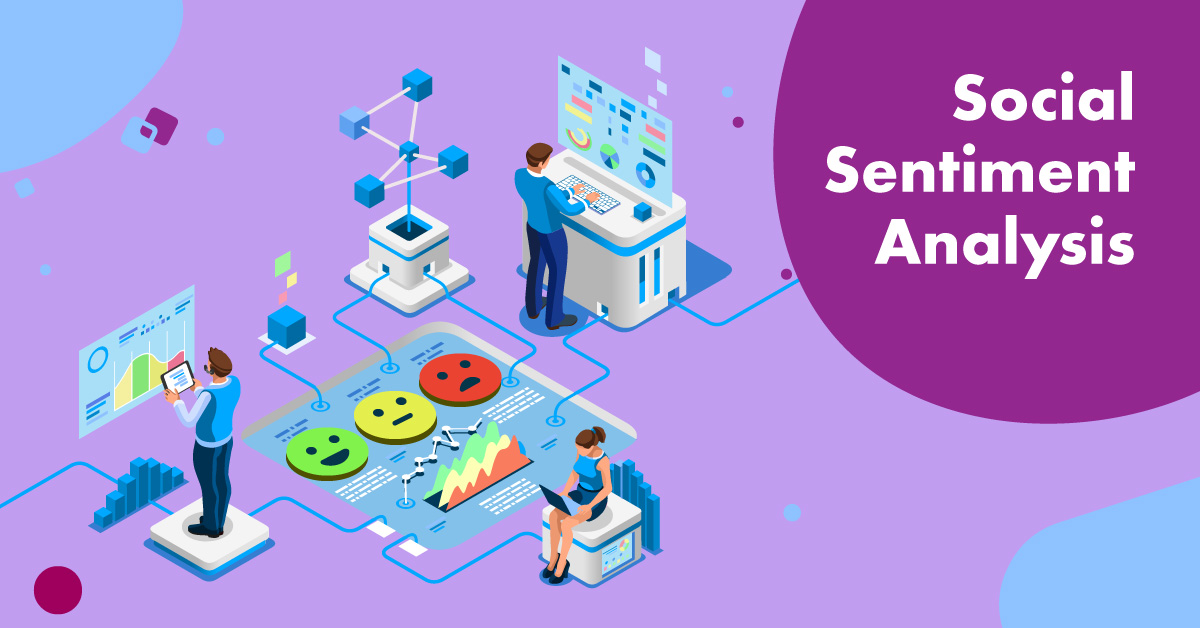

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873; font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">INTRODUCTION</p>

<div style="border-radius:5px;
            border : black solid;
            background-color: #E3E3E3;
            text-align: left">


### <mark>What is sentiment analysis?</mark> 
Sentiment analysis, also referred to as opinion mining, is an approach to natural language processing that identifies the emotional tone behind a body of text. This is a popular way for organizations to determine and categorize opinions about a product, service, or idea. It involves the use of data mining, machine learning and artificial intelligence to mine text for sentiment and subjective information.

Sentiment analysis systems help organizations gather insights from unorganized and unstructured text that comes from online sources such as emails, blog posts, support tickets, web chats, social media channels, forums and comments. Algorithms replace manual data processing by implementing rule-based, automatic or hybrid methods. Rule-based systems perform sentiment analysis based on predefined, lexicon-based rules while automatic systems learn from data with machine learning techniques. A hybrid sentiment analysis combines both approaches. In addition to identifying sentiment, opinion mining can extract the polarity (or the amount of positivity and negativity), subject and opinion holder within the text. Furthermore, sentiment analysis can be applied to varying scopes such as document, paragraph, sentence and sub-sentence levels.

### <mark>Types of sentiment analysis</mark>
Fine-grained sentiment analysis provides a more precise level of polarity by breaking it down into further categories, usually very positive to very negative. This can be considered the opinion equivalent of ratings on a 5-star scale.
Emotion detection identifies specific emotions rather than positivity and negativity. Examples could include happiness, frustration, shock, anger and sadness.
Intent-based analysis recognizes actions behind a text in addition to opinion. For example, an online comment expressing frustration about changing a battery could prompt customer service to reach out to resolve that specific issue.
Aspect-based analysis gathers the specific component being positively or negatively mentioned. For example, a customer might leave a review on a product saying the battery life was too short. Then, the system will return that the negative sentiment is not about the product as a whole, but about the battery life.
    
    

#### <mark>Reference:</mark> https://www.techtarget.com/searchbusinessanalytics/definition/opinion-mining-sentiment-mining

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873 ;font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">IMPORT NECESSARY LIBRARIES</p>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection, preprocessing, linear_model, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import ensemble
from sklearn.metrics import roc_auc_score, roc_curve


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import Word
nltk.download('wordnet')

from termcolor import colored
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import set_config
set_config(print_changed_only = False)

print(colored("\nLIBRARIES WERE SUCCESFULLY IMPORTED...", color = "green", attrs = ["dark", "bold"]))


LIBRARIES WERE SUCCESFULLY IMPORTED...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\A1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873 ;font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">LOAD DATASETS</p>

In [44]:
train_set = pd.read_csv(r"C:\Users\A1\Downloads\train.csv\train.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)

test_set = pd.read_csv(r"C:\Users\A1\Downloads\test.csv\test.csv",
                   encoding = "utf-8",
                   engine = "python",
                   header = 0)

print(colored("\nDATASETS WERE SUCCESFULLY LOADED...", color = "green", attrs = ["dark", "bold"]))


DATASETS WERE SUCCESFULLY LOADED...


### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">The first five rows of train set</span>

In [45]:
train_set.head(n = 5).style.background_gradient(cmap = "summer")

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">The first five rows of test set</span>

In [46]:
test_set.head(n = 5).style.background_gradient(cmap = "summer")

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Shapes of the train and test sets</span>

In [8]:
#"{},{},{}".format(1,2,3)
#"{1},{1},{0}".format(1,2,3)
#"{a},{a},{a}".format(a =1,b = 2,c = 3)

In [47]:
print("Train set shape: {} and test set shape: {}".format(train_set.shape, test_set.shape))

Train set shape: (31962, 3) and test set shape: (17197, 2)


### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Get general information about train set</span>

In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Check whether there are duplicated values</span>

In [11]:
print("Totally there are {} duplicated values in train_set".format(train_set.duplicated().sum()))

Totally there are 0 duplicated values in train_set


### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Get the number of classes of the "label" variable of train set</span>

In [48]:
train_set.groupby("label").count().style.background_gradient(cmap = "summer")

,id,tweet
label,,
0,29720,29720
1,2242,2242


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873 ;font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">CLEAN AND PROCESS DATASET</p>

### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Convert uppercase letters to lowercase letters in "tweet" columns</span>

In [49]:
test_set["tweet"]

0        #studiolife #aislife #requires #passion #dedic...
1         @user #white #supremacists want everyone to s...
2        safe ways to heal your #acne!!    #altwaystohe...
3        is the hp and the cursed child book up for res...
4          3rd #bihday to my amazing, hilarious #nephew...
                               ...                        
17192    thought factory: left-right polarisation! #tru...
17193    feeling like a mermaid ð #hairflip #neverre...
17194    #hillary #campaigned today in #ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my   song "so glad" free download!  #shoegaze ...
Name: tweet, Length: 17197, dtype: object

In [50]:
train_set["tweet"] = train_set["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))
test_set["tweet"] = test_set["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

print(colored("\nCONVERTED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))
test_set["tweet"]


CONVERTED SUCCESFULLY...


0        #studiolife #aislife #requires #passion #dedic...
1        @user #white #supremacists want everyone to se...
2        safe ways to heal your #acne!! #altwaystoheal ...
3        is the hp and the cursed child book up for res...
4        3rd #bihday to my amazing, hilarious #nephew e...
                               ...                        
17192    thought factory: left-right polarisation! #tru...
17193    feeling like a mermaid ð #hairflip #neverre...
17194    #hillary #campaigned today in #ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my song "so glad" free download! #shoegaze #ne...
Name: tweet, Length: 17197, dtype: object

### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Delete punctuation marks from "tweet" columns</span>

In [52]:
train_set["tweet"]

0        @user when a father is dysfunctional and is so...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model i love u take with u all the time in ur...
4                      factsguide: society now #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958    to see nina turner on the airwaves trying to w...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                       thank you @user for you follow
Name: tweet, Length: 31962, dtype: object

In [53]:
test_set["tweet"]

0        #studiolife #aislife #requires #passion #dedic...
1        @user #white #supremacists want everyone to se...
2        safe ways to heal your #acne!! #altwaystoheal ...
3        is the hp and the cursed child book up for res...
4        3rd #bihday to my amazing, hilarious #nephew e...
                               ...                        
17192    thought factory: left-right polarisation! #tru...
17193    feeling like a mermaid ð #hairflip #neverre...
17194    #hillary #campaigned today in #ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my song "so glad" free download! #shoegaze #ne...
Name: tweet, Length: 17197, dtype: object

In [54]:
train_set["tweet"] = train_set["tweet"].str.replace('[^\w\s]','')
test_set["tweet"] = test_set["tweet"].str.replace('[^\w\s]','')

print(colored("\nDELETED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


DELETED SUCCESFULLY...


In [55]:
train_set["tweet"]

0        @user when a father is dysfunctional and is so...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model i love u take with u all the time in ur...
4                      factsguide: society now #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958    to see nina turner on the airwaves trying to w...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                       thank you @user for you follow
Name: tweet, Length: 31962, dtype: object

### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Delete numbers from "tweet" columns</span>

In [56]:
test_set["tweet"]

0        #studiolife #aislife #requires #passion #dedic...
1        @user #white #supremacists want everyone to se...
2        safe ways to heal your #acne!! #altwaystoheal ...
3        is the hp and the cursed child book up for res...
4        3rd #bihday to my amazing, hilarious #nephew e...
                               ...                        
17192    thought factory: left-right polarisation! #tru...
17193    feeling like a mermaid ð #hairflip #neverre...
17194    #hillary #campaigned today in #ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my song "so glad" free download! #shoegaze #ne...
Name: tweet, Length: 17197, dtype: object

In [15]:
train_set['tweet'] = train_set['tweet'].str.replace('\d','')
test_set['tweet'] = test_set['tweet'].str.replace('\d','')

print(colored("\n NUMBERS DELETED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


 NUMBERS DELETED SUCCESFULLY...


### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Delete stopwords from "tweet" columns</span>

In [16]:
sw = stopwords.words("english")
train_set['tweet'] = train_set['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
test_set['tweet'] = test_set['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

print(colored("\nSTOPWORDS DELETED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


STOPWORDS DELETED SUCCESFULLY...


### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Lemmatization. That is, we get the roots of the words in the "tweet" columns</span>

In [17]:
train_set['tweet'] = train_set['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
test_set['tweet'] = test_set['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

print(colored("\nDONE SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


DONE SUCCESFULLY...


### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Drop "id" column from datasets</span>

In [18]:
train_set = train_set.drop("id", axis = 1)
test_set = test_set.drop("id", axis = 1)

print(colored("\n'ID' COLUMNS DROPPED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


'ID' COLUMNS DROPPED SUCCESFULLY...


### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Look at the latest condition of train set
</span>

In [19]:
train_set.head(n = 10)

,label,tweet
0,0,@user father dysfunctional selfish drag kid dy...
1,0,@user @user thanks #lyft credit can't use caus...
2,0,bihday majesty
3,0,#model love u take u time urð±!!! ððð...
4,0,factsguide: society #motivation
5,0,[2/2] huge fan fare big talking leave. chaos p...
6,0,@user camping tomorrow @user @user @user @user...
7,0,next school year year exams.ð¯ can't think ð...
8,0,won!!! love land!!! #allin #cavs #champions #c...
9,0,@user @user welcome ! i'm #gr8 !


### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Look at the latest condition of test set</span>

In [20]:
test_set.head(n = 10)

,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone see n...
2,safe way heal #acne!! #altwaystoheal #healthy ...
3,"hp cursed child book reservation already? yes,..."
4,"3rd #bihday amazing, hilarious #nephew eli ahm..."
5,choose :) #momtips
6,something inside dy ð¦ð¿â¨ eye ness #smok...
7,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,@user @user @user never understand dad left yo...
9,#delicious #food #lovelife #capetown mannaepic...


### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Divide datasets</span>

In [21]:
x = train_set["tweet"]
y = train_set["label"]

train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y, test_size = 0.20, shuffle = True, random_state = 11)

print(colored("\nDIVIDED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


DIVIDED SUCCESFULLY...


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873 ;font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">VECTORIZE DATA</p>

### Word Embeddings or Word vectorization is a methodology in NLP to map words or phrases from vocabulary to a corresponding vector of real numbers which used to find word predictions, word similarities/semantics.

![](https://miro.medium.com/max/1400/1*SyY1GT1GvKifzpyLc18YEg.png)

#### Refence: https://towardsdatascience.com/understanding-nlp-word-embeddings-text-vectorization-1a23744f7223

### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">"Count Vectors" method</span>

In [22]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)

x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">"TF-IDF" method</span>

In [23]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(train_x)

x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

x_train_tf_idf_word.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873 ;font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">BUILD MACHINE LEARNING MODELS</p>

### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Logistic regression model with "count-vectors" method</span>

In [24]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_count, train_y)
accuracy = model_selection.cross_val_score(log_model,
                                           x_test_count,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nLogistic regression model with 'count-vectors' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)


Logistic regression model with 'count-vectors' method
Accuracy ratio:  0.9488504114420065


### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Logistic regression model with "tf-idf" method</span>

In [25]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_tf_idf_word, train_y)
accuracy = model_selection.cross_val_score(log_model,
                                           x_test_tf_idf_word,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nLogistic regression model with 'tf-idf' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)


Logistic regression model with 'tf-idf' method
Accuracy ratio:  0.9305520180250783


### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">XGBoost model with "count-vectors" method</span>

In [26]:
from sklearn.ensemble import AdaBoostClassifier
xgb = AdaBoostClassifier()
xgb_model = xgb.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(xgb_model,
                                           x_test_count,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nXGBoost model with 'count-vectors' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)


XGBoost model with 'count-vectors' method
Accuracy ratio:  0.9418147531347962


### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">XGBoost model with "tf-idf" method</span>

In [27]:
xgb = AdaBoostClassifier()
xgb_model = xgb.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tf_idf_word, 
                                           test_y, 
                                           cv = 20).mean()

print(colored("\nXGBoost model with 'tf-idf' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)


XGBoost model with 'tf-idf' method
Accuracy ratio:  0.9402542123824453


### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;">Light GBM model with "count-vectors" method</span>

In [28]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [29]:
from lightgbm import LGBMClassifier


In [30]:

lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(x_train_count.astype("float64"), train_y)
accuracy = model_selection.cross_val_score(lgbm_model,
                                           x_test_count.astype("float64"),
                                           test_y,
                                           cv = 20).mean()

print(colored("\nLight GBM model with 'count-vectors' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)

[LightGBM] [Info] Number of positive: 1764, number of negative: 23805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.105991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4148
[LightGBM] [Info] Number of data points in the train set: 25569, number of used features: 1549
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.068990 -> initscore=-2.602312
[LightGBM] [Info] Start training from score -2.602312
[LightGBM] [Info] Number of positive: 454, number of negative: 5619
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1031
[LightGBM] [Info] Number of data points in the train set: 6073, number of used features: 384
[LightGBM] [Info] [b

### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;"> Light GBM model with "tf-idf" method</span>

In [31]:
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(lgbm_model,
                                           x_test_tf_idf_word,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nLight GBM model with 'tf-idf' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)

[LightGBM] [Info] Number of positive: 1764, number of negative: 23805
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.103618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40282
[LightGBM] [Info] Number of data points in the train set: 25569, number of used features: 1549
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.068990 -> initscore=-2.602312
[LightGBM] [Info] Start training from score -2.602312
[LightGBM] [Info] Number of positive: 454, number of negative: 5619
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6987
[LightGBM] [Info] Number of data points in the train set: 6073, number of used features: 384
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.074757 -> initscore=-2.515812
[Li

### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;"> ROC AUC (curvature)</span>

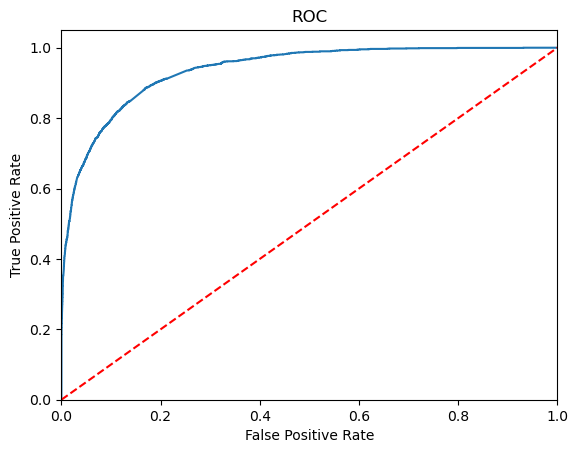

In [32]:
y = train_y
X = x_train_count.astype("float64")

logit_roc_auc = roc_auc_score(y, lgbm_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, lgbm_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873 ;font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">ESTIMATION OVER TEST SET</p>

### <span style = "background:#4D1873; font-size:100%; color:#fff; border-radius:0px;"> Look at the first 5 rows of the test set</span>

In [33]:
test_set.head()

,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone see n...
2,safe way heal #acne!! #altwaystoheal #healthy ...
3,"hp cursed child book reservation already? yes,..."
4,"3rd #bihday amazing, hilarious #nephew eli ahm..."


## <mark>Here we encode values of "tweet" column of test set with "count-vectors" method.</mark>

In [34]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)
test_set = vectorizer.transform(test_set["tweet"])
test_set.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
lgbm_model.predict(test_set.astype("float"))[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4D1873 ;font-family:arial;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">VISUALIZATION WITH WORD CLOUD</p>

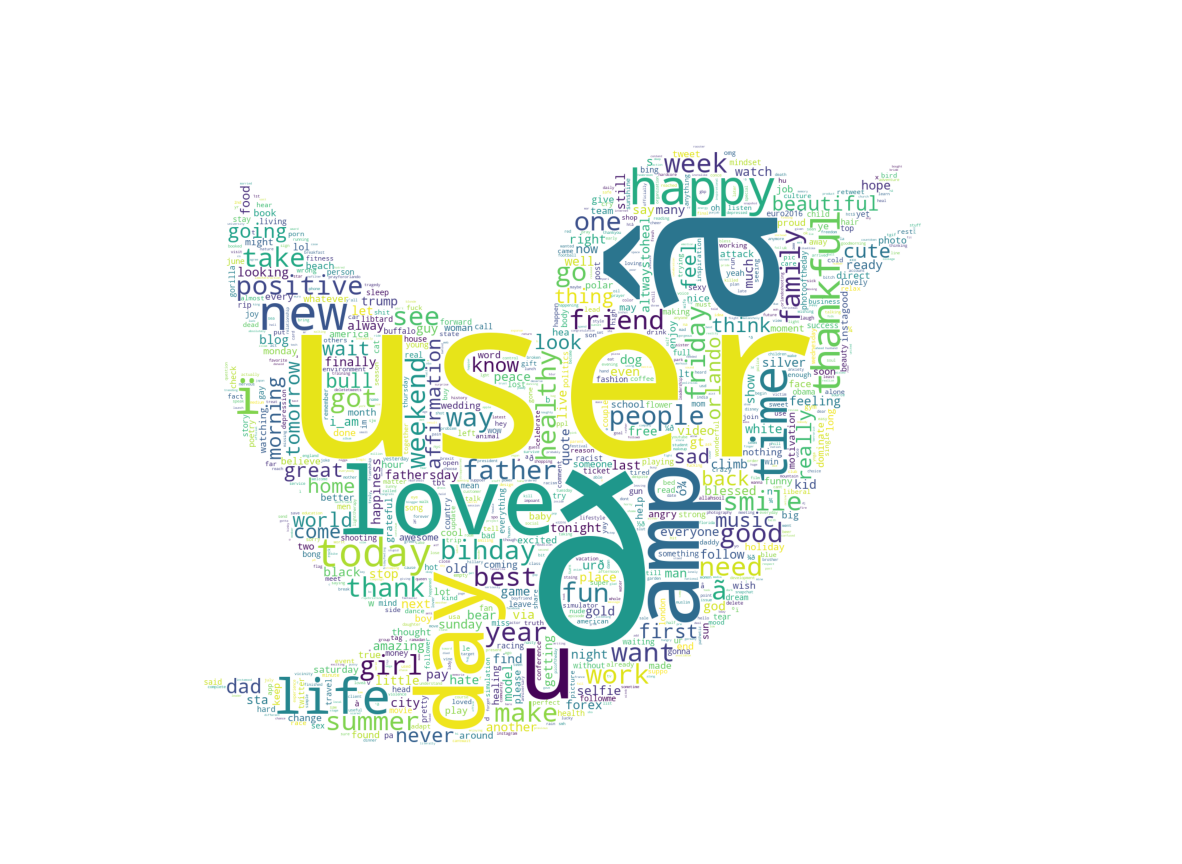

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

tw_mask = np.array(Image.open(r"C:\Users\A1\Downloads\10wmt-superJumbo-v4.jpg"))# Try for some other message as well

text = " ".join(i for i in train_set.tweet)

wc = WordCloud(background_color = "white",
               width = 600, mask = tw_mask,
               height = 600,
               contour_width = 0,
               contour_color = "red",
               max_words = 1000,
               scale = 1,
               collocations = False,
               repeat = True,
               min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 15])
plt.imshow(wc)
plt.axis("off")
plt.show;

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Sample text data
texts = [
    "I love programming in Python.",
    "Python programming is fun.",
    "I love machine learning and data science and machine data."
]

# 2. Apply Count Vectorizer
* Count Vectorizer counts the occurrences of each word in each sentence.

In [43]:
# Initialize Count Vectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(texts)
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

print("Count Vectorizer Matrix:\n", count_df)

Count Vectorizer Matrix:
    data  fun  learning  love  machine  programming  python  science
0     0    0         0     1        0            1       1        0
1     0    1         0     0        0            1       1        0
2     2    0         1     1        2            0       0        1


* In Sentence 1 ("I love programming in Python"), the words "love," "programming," and "python" appear once each, so each is represented with a 1.
* In Sentence 3, new terms appear: "data," "learning," and "machine."

# 3. Apply TF-IDF Vectorizer
* TF-IDF Vectorizer calculates a weight for each word in each sentence, considering both frequency within each sentence and across all sentences.

In [39]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("\nTF-IDF Vectorizer Matrix:\n", tfidf_df)


TF-IDF Vectorizer Matrix:
        data       fun  learning      love   machine  programming    python  \
0  0.000000  0.000000  0.000000  0.577350  0.000000     0.577350  0.577350   
1  0.000000  0.680919  0.000000  0.000000  0.000000     0.517856  0.517856   
2  0.467351  0.000000  0.467351  0.355432  0.467351     0.000000  0.000000   

    science  
0  0.000000  
1  0.000000  
2  0.467351  


* Sentence 1: "Love" has a high score because it only appears here and in one other sentence. "Programming" and "python" are weighted lower as they appear in multiple sentences.
* Sentence 2: "Fun" has a higher weight since it’s unique to this sentence, while "Python" and "Programming" have equal lower weights.
* Sentence 3: "Data," "learning," "love," and "machine" have similar weights, all being relatively unique here.

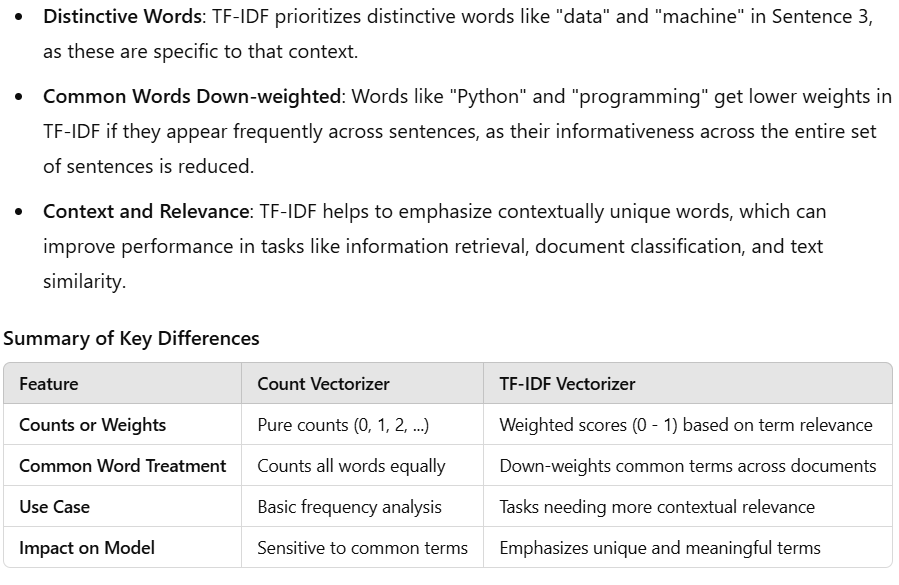

# Applying the Bag of Words Model

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Sample text data
texts = [
    "I love programming in Python.",
    "Python programming is fun.",
    "I love machine learning and data science."
]

### Apply Bag of Words Model (Count Vectorizer)
* Count Vectorizer can be used to implement the Bag of Words model by counting occurrences of each word in the vocabulary across documents. Each word is treated as a separate feature, and the result is a sparse matrix.

In [41]:
# Initialize Count Vectorizer (BoW)
bow_vectorizer = CountVectorizer(stop_words='english')
bow_matrix = bow_vectorizer.fit_transform(texts)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())

print("Bag of Words Matrix:\n", bow_df)

Bag of Words Matrix:
    data  fun  learning  love  machine  programming  python  science
0     0    0         0     1        0            1       1        0
1     0    1         0     0        0            1       1        0
2     1    0         1     1        1            0       0        1


### Key Observations in Bag of Words
* Simple Word Counts: BoW is straightforward, focusing only on raw word counts without any adjustment for importance or uniqueness.
* Sparse Representation: If we have many documents, most words appear in only a few of them, leading to a sparse matrix (mostly zeros).
* Loss of Context: Since BoW disregards word order, it can’t capture nuances or contextual meaning, which can limit its effectiveness in understanding sentence structure or semantics.

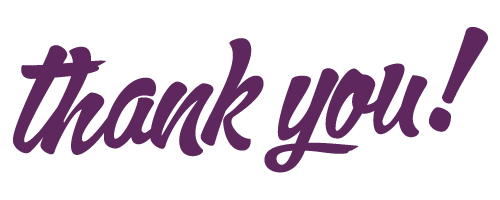